In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Loop the data lines
with open("/Users/ashwinsaxena/Google Drive/Auction/0x00000000f7B7d8A2974a129CbADd9F2F99C1fF80.csv", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
df = pd.read_csv("/Users/ashwinsaxena/Google Drive/Auction/0x00000000f7B7d8A2974a129CbADd9F2F99C1fF80.csv", header=None, delimiter=",", names=column_names)

In [3]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [4]:
df=df.drop([0], axis = 1)
df=df.drop([0,1], axis = 0)

In [5]:
df1=df.loc[:, (df != 0).any(axis=0)] #dropping zeros columns

In [7]:
df2=df1.transpose()

In [1]:
df2.head()

NameError: name 'df2' is not defined

In [9]:
x = df1.iloc[:, 1:25]
y = df1[26]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train, y_train)

LinearRegression()

In [15]:
print(model.coef_)

[ 1.58761037e-04  1.17238633e-03  1.58761037e-04 -7.07156142e-04
 -1.28755752e-16  1.93535751e-06  4.13412285e-11  1.58761037e-04
  1.40638369e-03  1.25635225e-04  1.80851143e-03  6.26024472e-04
  9.99775605e-01  8.92394597e-04 -1.10574348e-03 -1.69623725e-03
  1.22571044e-02  9.86038569e-04 -7.66975528e-03 -2.41575278e-04
  1.43430149e-04 -1.30509447e-03 -1.22555191e-04  1.04262224e-04]


In [16]:
print(model.intercept_)

1.593217479689546e-05


In [17]:
predictions = model.predict(x_test)

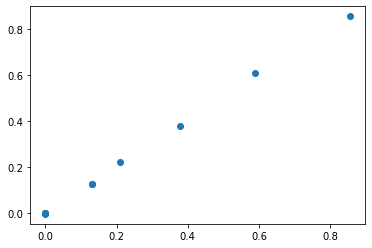

In [18]:
plt.scatter(y_test, predictions)

(array([1., 0., 0., 1., 0., 0., 0., 0., 5., 3.]),
 array([-0.01842983, -0.01624916, -0.01406848, -0.01188781, -0.00970713,
        -0.00752646, -0.00534578, -0.00316511, -0.00098444,  0.00119624,
         0.00337691]),
 <BarContainer object of 10 artists>)

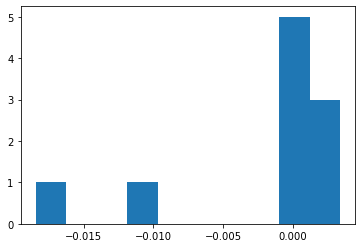

In [19]:
plt.hist(y_test - predictions)